# Superstore Data Preprocessing     


In [2]:
import pandas as pd
import os


def preprocess_superstore(input_file, output_file, drop_columns=None):
    """
    Preprocess the Superstore dataset.

    Steps:
    - Read CSV with encoding handling.
    - Convert 'Order Date' and 'Ship Date' to datetime.
    - Drop unnecessary columns and rows with missing critical values.
    - Save cleaned dataset.

    Parameters
    ----------
    input_file : str
        Path to input CSV file.
    output_file : str
        Path where the processed CSV will be saved.
    drop_columns : list, optional
        List of columns to drop from the dataset.

    Returns
    -------
    pd.DataFrame
        The cleaned dataframe.
    """

    # Load safely
    try:
        df = pd.read_csv(input_file, encoding="latin1")
    except FileNotFoundError:
        raise FileNotFoundError(f"❌ Input file not found: {input_file}")
    except UnicodeDecodeError as e:
        raise RuntimeError(f"❌ Encoding issue reading file: {e}")

    # Convert date columns
    for col in ["Order Date", "Ship Date"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
        else:
            print(f"⚠️ Warning: '{col}' column missing.")

    # Drop rows missing critical dates
    df = df.dropna(subset=["Order Date", "Ship Date"], how="any")

    # Drop specific columns if present
    if drop_columns:
        cols_to_drop = [col for col in drop_columns if col in df.columns]
        df = df.drop(cols_to_drop, axis=1)

    # Save result
    os.makedirs(os.path.dirname(output_file) or ".", exist_ok=True)
    df.to_csv(output_file, index=False)

    print(f"✅ Preprocessed file saved at: {output_file}")
    print(f"Rows: {len(df)}, Columns: {len(df.columns)}")

    return df


if __name__ == "__main__":
    # File names only (expects CSV in the same folder as this script)
    input_file = "Sample - Superstore.csv"
    output_file = "Superstore_Preprocessed.csv"

    drop_cols = [
        "Row ID",
        "Order ID",
        "Order Date",
        "Ship Date",
        "Ship Mode",
        "Customer ID",
        "Postal Code",
    ]

    preprocess_superstore(input_file, output_file, drop_columns=drop_cols)


✅ Preprocessed file saved at: Superstore_Preprocessed.csv
Rows: 9994, Columns: 14


In [3]:
import pandas as pd
show_Superstore = pd.read_csv('Superstore_Preprocessed.csv')
show_Superstore

,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv('Superstore_Preprocessed.csv')

# 1. Total Sales and Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
# 2. Most Profitable Product Sub-Category
most_profitable_sub_category = df.groupby('Sub-Category')['Profit'].sum().idxmax()
most_profitable_sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().max()
# 3. Customer Segment with the highest sales
highest_sales_segment = df.groupby('Segment')['Sales'].sum().idxmax()
highest_sales_segment_value = df.groupby('Segment')['Sales'].sum().max()

# Print the insights
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"\nMost Profitable Product Sub-Category: {most_profitable_sub_category} with a profit of ${most_profitable_sub_category_profit:,.2f}")
print(f"Customer Segment with the Highest Sales: {highest_sales_segment} with sales of ${highest_sales_segment_value:,.2f}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02

Most Profitable Product Sub-Category: Copiers with a profit of $55,617.82
Customer Segment with the Highest Sales: Consumer with sales of $1,161,401.34


In [5]:
import pandas as pd
table_sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5).reset_index()
print("\nTop Product Categories by Sales:")
table_sales_by_category



Top Product Categories by Sales:


,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


In [6]:
import pandas as pd
table_sales_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()
print("\nTop 5 States by Profit:")
table_sales_by_state



Top 5 States by Profit:


,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504


In [7]:
import pandas as pd
table_sales_by_City= df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()
print("\nTop 5 Cities by Profit:")
table_sales_by_City



Top 5 Cities by Profit:


,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908


In [8]:
import pandas as pd
table_sales_by_product= df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()
print("\nTop 5 Products by Profit:")
table_sales_by_product



Top 5 Products by Profit:


,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


# Total Sales by category

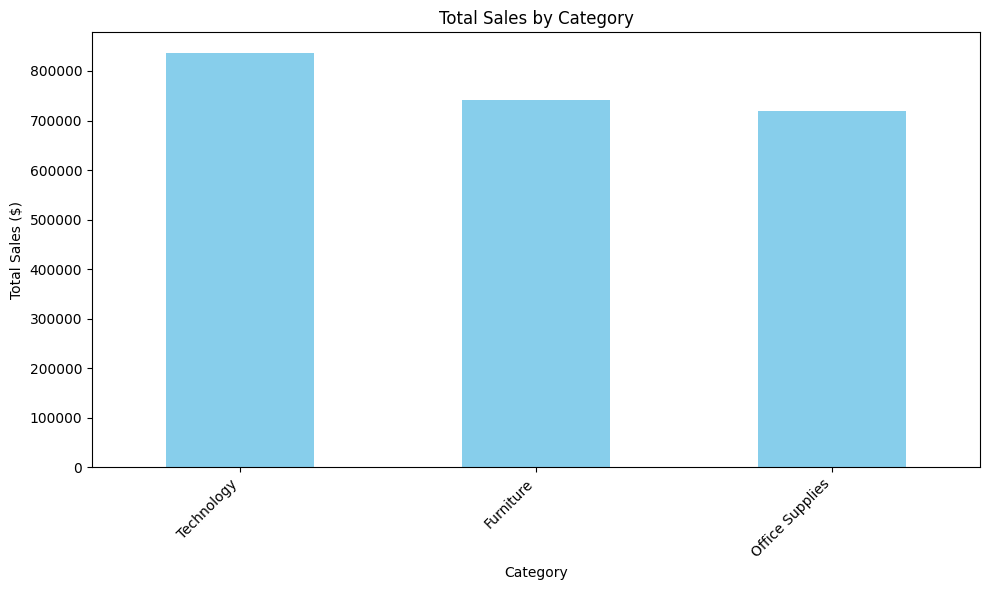

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('Superstore_Preprocessed.csv')

# Group by 'Category' and sum 'Sales'
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
plt.savefig('sales_by_category_bar_chart.png')

# Top 5 States by Profit

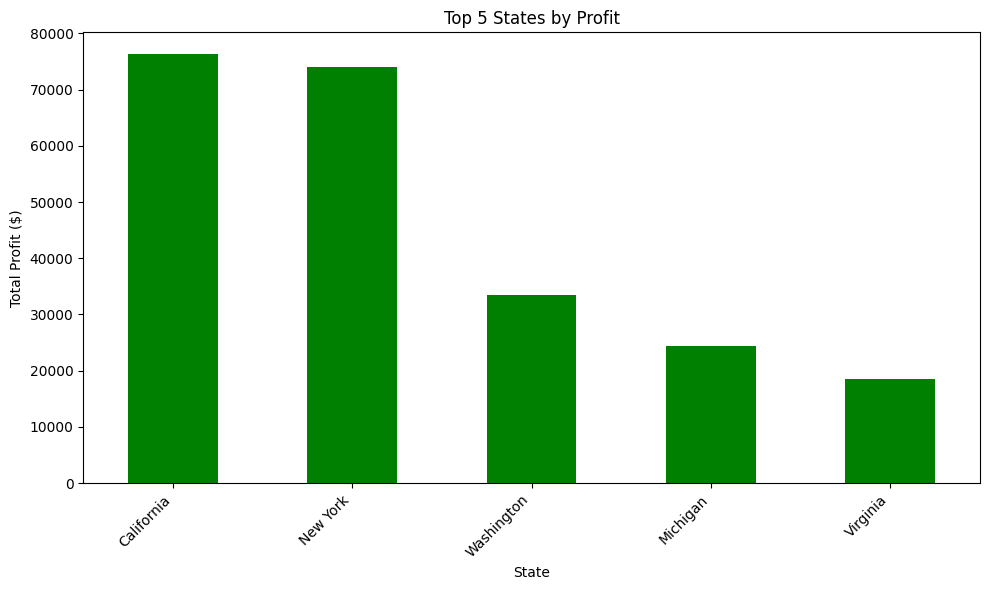

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('Superstore_Preprocessed.csv')

# Group by 'State' and sum 'Profit' to find the top 5 states
top_5_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5)

# Create a bar chart for the top 5 states by profit
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='green')
plt.title('Top 5 States by Profit')
plt.xlabel('State')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
plt.savefig('top_5_states_profit_bar_chart.png')

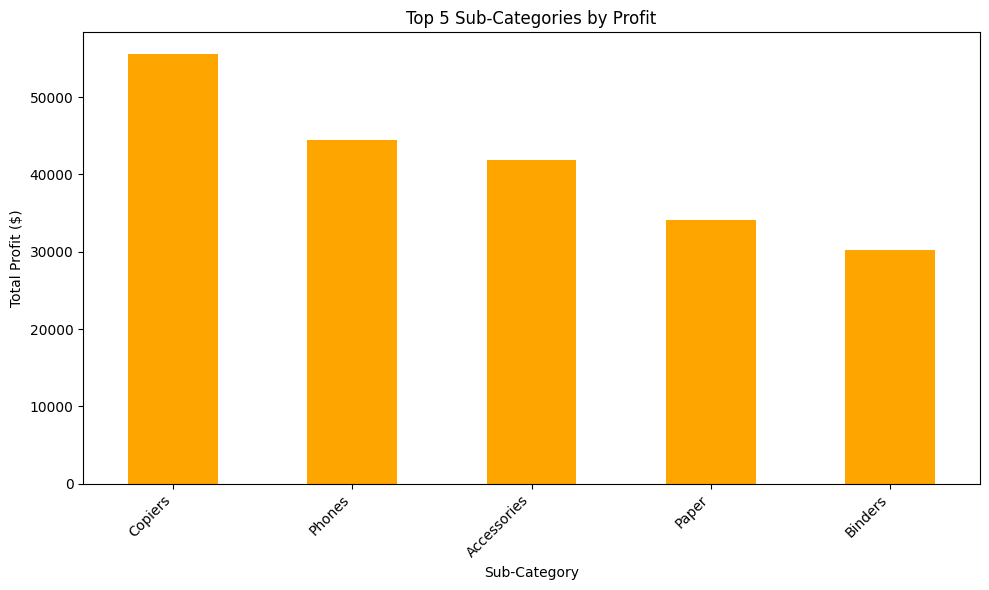

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('Superstore_Preprocessed.csv')

# Group by 'Sub-Category' and sum 'Profit'
profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
# Create a bar chart for the top 5 sub-categories by profit
plt.figure(figsize=(10, 6))
profit_by_sub_category.plot(kind='bar', color='orange')
plt.title('Top 5 Sub-Categories by Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot to a file
plt.savefig('top_5_subcategories_profit_bar_chart.png')

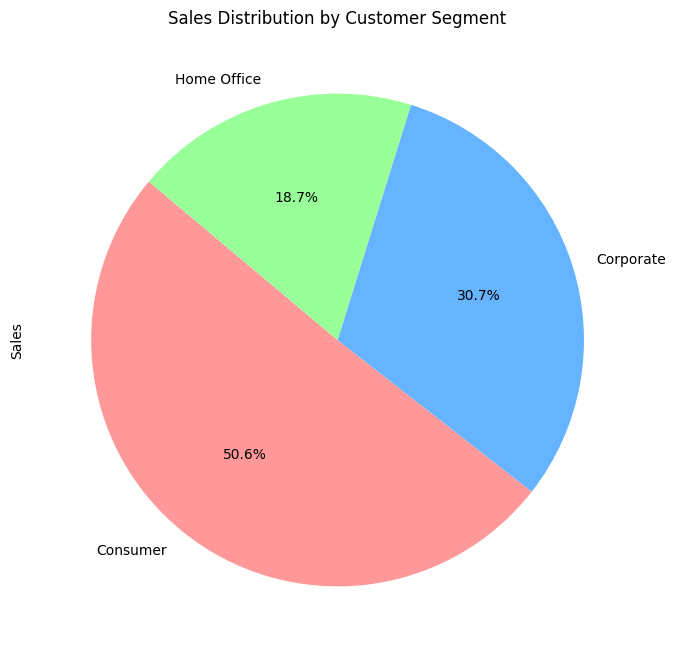

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the preprocessed data
df = pd.read_csv('Superstore_Preprocessed.csv')
# Group by 'Segment' and sum 'Sales'
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
# Create a pie chart for sales by customer segment
plt.figure(figsize=(8, 8))
sales_by_segment.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Distribution by Customer Segment')
# Save the plot to a file
plt.savefig('sales_by_segment_pie_chart.png')
# 2. Most Profitable Product Sub-Category
most_profitable_sub_category = df.groupby('Sub-Category')['Profit'].sum().idxmax()
most_profitable_sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().max
# 3. Customer Segment with the highest sales
highest_sales_segment = df.groupby('Segment')['Sales'].sum().idxmax()
highest_sales_segment_value = df.groupby('Segment')['Sales'].sum().max()


In [14]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.platypus.tables import TableStyle
import os

# -----------------------------
# Summary values from your preprocessing
# -----------------------------
total_sales = 2297200.86
total_profit = 286397.02
most_profitable_sub_category = "Copiers"
most_profitable_sub_category_profit = 55617.82
highest_sales_segment = "Consumer"
highest_sales_segment_value = 1161401.34

# Ensure numeric types for formatting
most_profitable_sub_category_profit = float(most_profitable_sub_category_profit)
total_sales = float(total_sales)
total_profit = float(total_profit)
highest_sales_segment_value = float(highest_sales_segment_value)

# -----------------------------
# PDF Setup
# -----------------------------
pdf_file = "Superstore_Report.pdf"
doc = SimpleDocTemplate(pdf_file, pagesize=letter)
styles = getSampleStyleSheet()
elements = []

# Title
title = Paragraph("Superstore Sales Report", styles['Title'])
elements.append(title)
elements.append(Spacer(1, 12))

# Summary Table
summary_data = [
    ["Metric", "Value"],
    ["Total Sales", f"${total_sales:,.2f}"],
    ["Total Profit", f"${total_profit:,.2f}"],
    ["Most Profitable Sub-Category", f"{most_profitable_sub_category} (${most_profitable_sub_category_profit:,.2f})"],
    ["Top Customer Segment by Sales", f"{highest_sales_segment} (${highest_sales_segment_value:,.2f})"]
]

summary_table = Table(summary_data, colWidths=[250, 250])
summary_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
]))
elements.append(summary_table)
elements.append(Spacer(1, 24))

# -----------------------------
# Charts (replace with your actual chart files)
# -----------------------------
chart_files = [
    'sales_by_category_bar_chart.png',
    'top_5_states_profit_bar_chart.png',
    'top_5_subcategories_profit_bar_chart.png'
]

for chart in chart_files:
    if os.path.exists(chart):
        elements.append(Image(chart, width=400, height=300))
        elements.append(Spacer(1, 12))
    else:
        print(f"⚠️ Warning: Chart file {chart} not found.")

# -----------------------------
# Build PDF
# -----------------------------
doc.build(elements)
print(f"✅ PDF generated: {pdf_file}")



✅ PDF generated: Superstore_Report.pdf
